 Análise exploratória de Dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import date
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
dadoscars = pd.read_csv('C:/Users/rrsso/OneDrive/Área de Trabalho/AnalysisExploratoriaDados/used_cars_datas.csv')

In [4]:
dadoscars.info() # ajuda a entender o tipo de dados e as informações sobre dados, incluindo o número de registros em cada coluna, dados nulos ou não nulos, Tipo de dados, o uso de memória do conjunto de dados
#dadoscars.shape A forma exibirá o número de observações(linhas) e recursos(colunas) no conjunto de dados
#dadoscars.head() exibirá as 5 principais observações do conjunto de dados
#dadoscars.tail() exibirá as últimas 5 observações do conjunto de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [5]:
dadoscars.nunique(axis=0, dropna=True) #Use a nunique()função para encontrar o número de valores exclusivos sobre o eixo do índice em um dataframe. O dataframe contém NaNvalores.

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [6]:
dadoscars.nunique(axis=1) #Use a nunique()função para encontrar o número de valores únicos no eixo da coluna. 

0       13
1       13
2       14
3       13
4       13
        ..
7248    12
7249    12
7250    12
7251    12
7252    12
Length: 7253, dtype: int64

In [7]:
dadoscars.isnull().sum()
#isnull() é amplamente utilizado em todas as etapas de pré-processamento para identificar valores nulos nos dados
#é usado para obter o número de registros ausentes em cada coluna

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [8]:
round((dadoscars.isnull().sum() / (len(dadoscars))), 3) * 100 #calcula a porcentagem de valores ausentes em cada coluna

S.No.                 0.0
Name                  0.0
Location              0.0
Year                  0.0
Kilometers_Driven     0.0
Fuel_Type             0.0
Transmission          0.0
Owner_Type            0.0
Mileage               0.0
Engine                0.6
Power                 0.6
Seats                 0.7
New_Price            86.1
Price                17.0
dtype: float64

In [9]:
dadoscars = dadoscars.drop(['S.No.'], axis=1) #series S.No. foi excluida com a functions drop()

In [10]:
dadoscars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [11]:
date.today().year

2024

In [12]:
dadoscars['Car_Age'] = date.today().year - dadoscars['Year']

In [13]:
dadoscars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11


In [14]:
dadoscars['Brand'] = dadoscars.Name.str.split().str.get(0) #criada a serie Brand e realizado um split

In [15]:
dadoscars['Model'] = dadoscars.Name.str.split().str.get(1) + " " + dadoscars.Name.str.split().str.get(2) #criada a serie Model e realizado um split

In [16]:
dadoscars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14,Maruti,Wagon R
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9,Hyundai,Creta 1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11,Audi,A4 New


In [17]:
print(dadoscars.Brand.unique()) #retorna os valores únicos de uma serie
print(dadoscars.Brand.nunique()) #retorna o quantidade de valores únicos de uma series

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
33


In [18]:
searchfor = ['Isuzu', 'ISUZU', 'Mini', 'Land']
dadoscars[dadoscars.Brand.str.contains('|'.join(searchfor))]
dadoscars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14,Maruti,Wagon R
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9,Hyundai,Creta 1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11,Audi,A4 New


In [19]:
dadoscars['Brand'].replace({'ISUZU': 'Isuzu', 'Mini': 'Mini Cooper', 'Land': 'Land Rover'}, inplace=True)

In [20]:
dadoscars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14,Maruti,Wagon R
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9,Hyundai,Creta 1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11,Audi,A4 New


In [21]:
print(dadoscars.Brand.unique()) #retorna os valores únicos de uma serie
print(dadoscars.Brand.nunique()) #retorna o quantidade de valores únicos de uma series

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land Rover' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra'
 'Ford' 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda'
 'Mini Cooper' 'Fiat' 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'Force'
 'Bentley' 'Lamborghini' 'Hindustan' 'OpelCorsa']
32


In [22]:
dadoscars.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7207,386,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# separamos variáveis numéricas e categóricas para facilitar a análise
cat_cols = dadoscars.select_dtypes(include=['object']).columns
nun_cols = dadoscars.select_dtypes(include=np.number).columns.tolist()

print('Categorical Variables:')

print(cat_cols)

print('Numerical Variables:')

print(nun_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price', 'Brand', 'Model'],
      dtype='object')
Numerical Variables:
['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Car_Age']


Year
Skew : -0.84


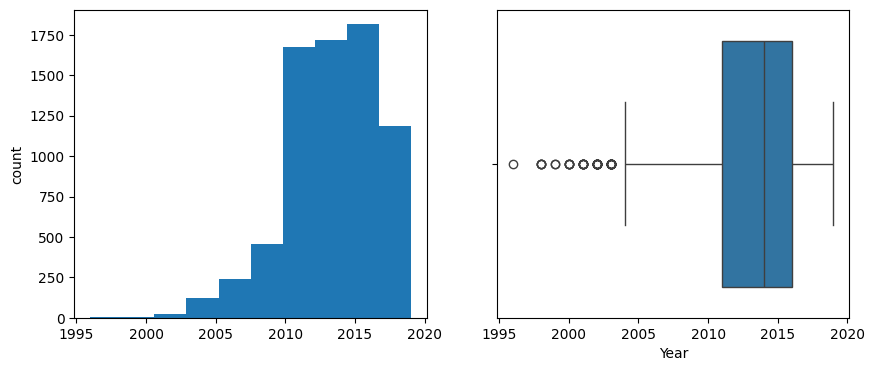

Kilometers_Driven
Skew : 61.58


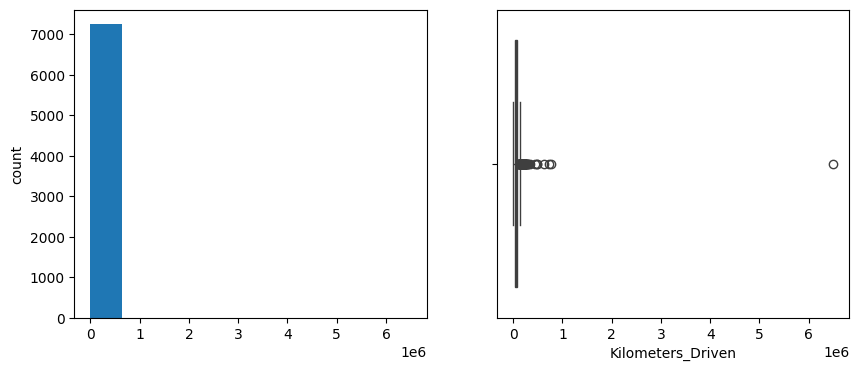

Seats
Skew : 1.9


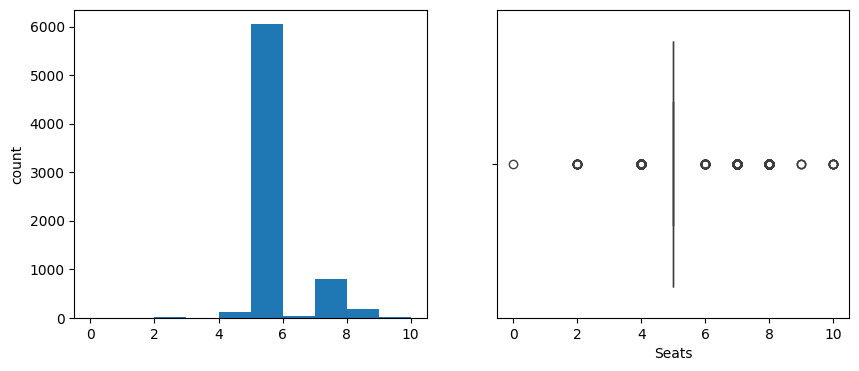

Price
Skew : 3.34


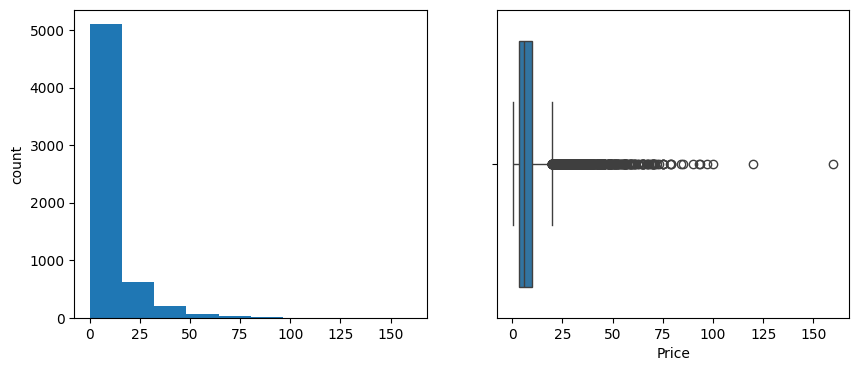

Car_Age
Skew : 0.84


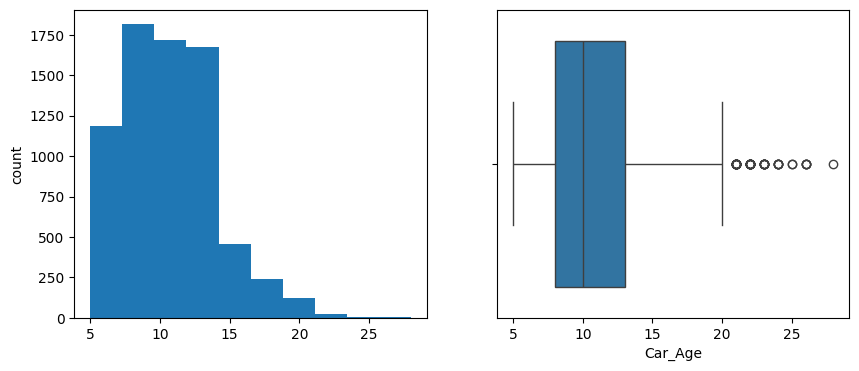

In [25]:
# análise univariada pode ser feita tanto para variáveis categóricas quanto numéricas.

# A análise univariada consiste basicamente em, para cada uma das variáveis individualmente: 
# Classificar a variável quanto a seu tipo: qualitativa (nominal ou ordinal) ou quantitativa (discreta ou contínua)

# As variáveis categóricas podem ser visualizadas usando um gráfico de contagem, gráfico de barras, gráfico de pizza, etc.
# Numérico As variáveis podem ser visualizadas usando Histograma, Box Plot, Gráfico de Densidade, etc.

for col in nun_cols:
    print(col)
    print('Skew :', round(dadoscars[col].skew(), 2))
    plt.figure(figsize = (10, 4))
    plt.subplot(1, 2, 1)
    dadoscars[col].hist(grid=False)
    
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dadoscars[col])
    plt.show()